# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load the Dataset

In [3]:
df=pd.read_json("Sarcasm_Headlines_Dataset.json", lines=True)
df.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26709 entries, 0 to 26708
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   article_link  26709 non-null  object
 1   headline      26709 non-null  object
 2   is_sarcastic  26709 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 626.1+ KB


In [5]:
df['is_sarcastic'].value_counts()

0    14985
1    11724
Name: is_sarcastic, dtype: int64

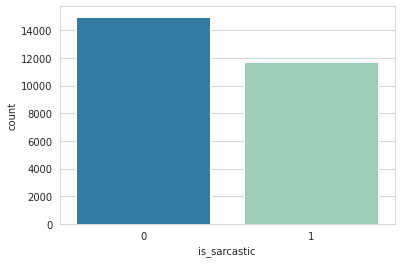

In [6]:
sns.set_style('whitegrid')
sns.countplot(x='is_sarcastic',data=df, palette='YlGnBu_r')

# Train-Test Split

In [0]:
from sklearn.model_selection import train_test_split
X=df['headline'].values
y=df['is_sarcastic'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Tokenization and Padding

In [0]:
vocab_size=10000
embedding_dim=16
max_length=32
trunc_type='post'
padding_type='post'
oov_tok='<oov>'

In [0]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer= Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)

word_index=tokenizer.word_index

training_sequences=tokenizer.texts_to_sequences(X_train)
training_padded=pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences=tokenizer.texts_to_sequences(X_test)
testing_padded=pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Building the Model with Word Embedding

In [0]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, Flatten

In [11]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
model.add(Flatten())

model.add(Dense(units=32,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=10,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))

opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 32, 16)            160000    
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                16416     
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 1

In [0]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [13]:
model.fit(x=training_padded, y=y_train, batch_size=256, epochs=100, validation_data=(testing_padded, y_test), verbose=1, callbacks=[early_stop])

Epoch 1/100
74/74 [==============================] - 1s 9ms/step - loss: 0.6920 - accuracy: 0.5454 - val_loss: 0.6911 - val_accuracy: 0.5548
Epoch 2/100
74/74 [==============================] - 0s 5ms/step - loss: 0.6896 - accuracy: 0.5596 - val_loss: 0.6889 - val_accuracy: 0.5546
Epoch 3/100
74/74 [==============================] - 0s 6ms/step - loss: 0.6872 - accuracy: 0.5603 - val_loss: 0.6869 - val_accuracy: 0.5546
Epoch 4/100
74/74 [==============================] - 0s 5ms/step - loss: 0.6856 - accuracy: 0.5612 - val_loss: 0.6854 - val_accuracy: 0.5546
Epoch 5/100
74/74 [==============================] - 0s 5ms/step - loss: 0.6846 - accuracy: 0.5626 - val_loss: 0.6838 - val_accuracy: 0.5546
Epoch 6/100
74/74 [==============================] - 0s 5ms/step - loss: 0.6826 - accuracy: 0.5628 - val_loss: 0.6812 - val_accuracy: 0.5546
Epoch 7/100
74/74 [==============================] - 0s 5ms/step - loss: 0.6785 - accuracy: 0.5630 - val_loss: 0.6769 - val_accuracy: 0.5546
Epoch 8/100
7

# Visualization (Loss & Accuracy)

In [15]:
df_m=pd.DataFrame(model.history.history)
df_m['Epoch']=range(1,36)
df_m.index=df_m['Epoch']
df_m

,loss,accuracy,val_loss,val_accuracy,Epoch
Epoch,,,,,
1,0.691972,0.545357,0.691100,0.554848,1
2,0.689645,0.559638,0.688937,0.554599,2
3,0.687173,0.560334,0.686917,0.554599,3
4,0.685551,0.561190,0.685421,0.554599,4
5,0.684620,0.562580,0.683824,0.554599,5
6,0.682603,0.562794,0.681157,0.554599,6
7,0.678450,0.563008,0.676870,0.554599,7
8,0.673380,0.565469,0.669716,0.554724,8
9,0.664586,0.570229,0.658200,0.556596,9


In [16]:
score = model.evaluate(testing_padded, y_test, batch_size=64, verbose=1)
print('Test accuracy:', score[1])

126/126 [==============================] - 0s 1ms/step - loss: 0.3227 - accuracy: 0.8712
Test accuracy: 0.8712092638015747


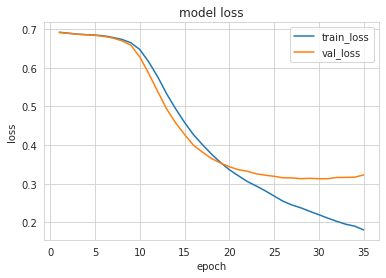

In [17]:
#Loss Graph(Training and Validation)
plt.plot(df_m['loss'])
plt.plot(df_m['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

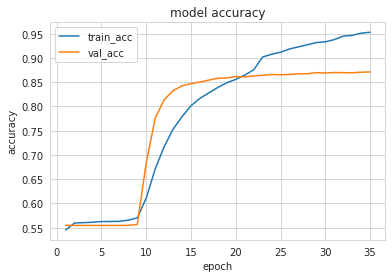

In [18]:
# Accuracy Graph(Training and Validation) 
plt.plot(df_m['accuracy'])
plt.plot(df_m['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_acc', 'val_acc'])
plt.show()